In [253]:
from limbus.image import read_image

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

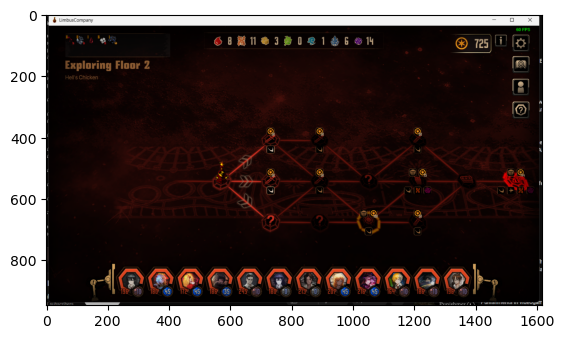

In [254]:
DIR = "..\images"

img_name = "\\train_5.png"
img = read_image(f"{DIR+img_name}")

# plt.figure(figsize=(16,8))
plt.imshow(img)
plt.show()

In [ ]:
def pipeline(img, flags=[]):
    kernel = np.ones((3,3),np.uint8)

    im = img
    print("Before Gray: ", np.mean(im), np.median(im))

    if "mult" in flags:
        im = cv.multiply(im, 1)

    if "gray" in flags:
        im = cv.cvtColor(im, cv.COLOR_RGB2GRAY)

    print("After Gray: ", np.mean(im), np.median(im))

    if "scale" in flags:
        im = cv.convertScaleAbs(im, alpha=0.65, beta=0)

    if "blur" in flags:
        im = cv.GaussianBlur(im, (7,1), 0)

    if "thresh" in flags:
        thresh = 30 if np.median(im) < 10 else 50
        _, im = cv.threshold(im, thresh, 255, cv.THRESH_BINARY)

    if "adapt_thresh" in flags:
        im = cv.adaptiveThreshold(im, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 5)
    
    if "erosion" in flags:
        im = cv.erode(im, kernel, iterations=1)

    if "canny" in flags:
        im = cv.Canny(im, 50, 100)


    return im

22.656107439667 8.0
22.773227667097842 8.0
18.268906559390594 2.0
27.200250481972216 12.0
23.328757262215074 8.0
26.255557527968747 11.0
21.189252248007175 5.0


IndexError: list index out of range

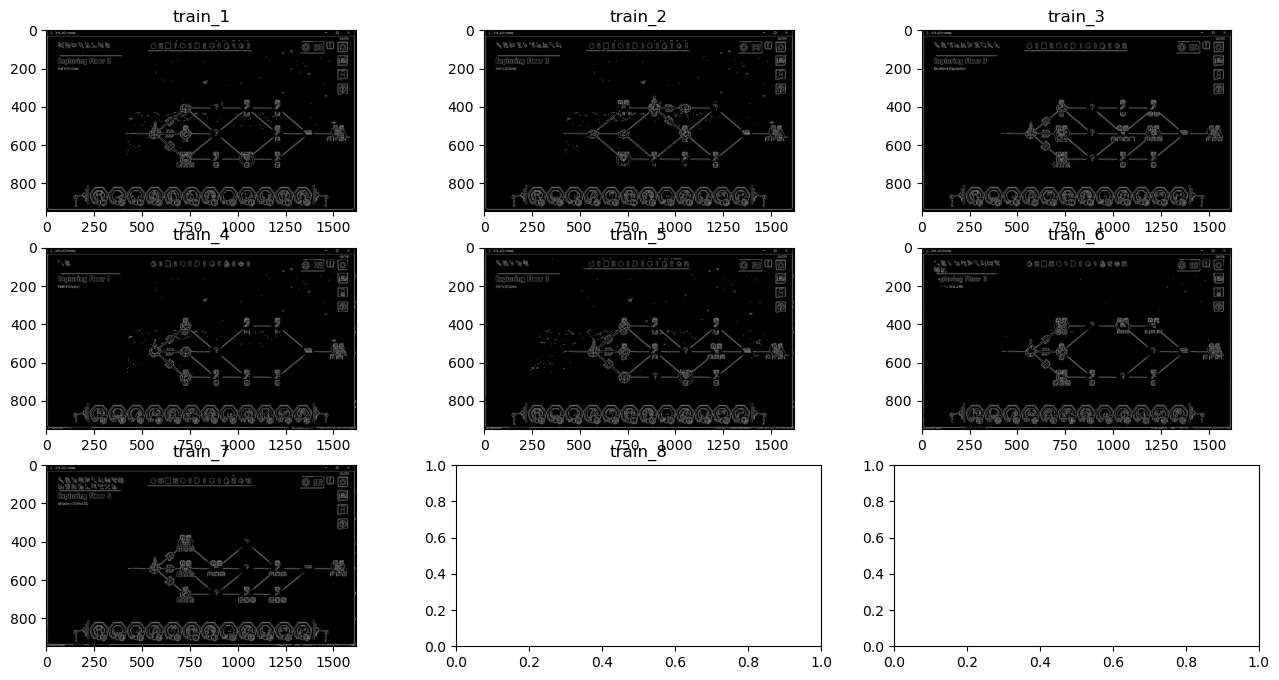

In [256]:
args = [
    # "scale",
    "gray",
    # "blur",
    "thresh",
    # "adapt_thresh",
    "canny",
]

processed = []
for i in range(1, 8):
    img = read_image(DIR + f"\\train_{i}.png")
    im = pipeline(img, args)
    processed.append(im)

col, row = [3, 3]
fig, axes = plt.subplots(row, col, figsize=(16,8))

index = 0
for i in range(col):
    for j in range(row):
        axes[i,j].set_title(f"train_{1+index}")
        axes[i,j].imshow(processed[index], cmap='gray')
        index += 1